Authors:

Shadi Farokhghate

Hridoy Pal

Md Jamil Ahmed

School of Computer Science
Univeristy of Windsor


**Importing necessary packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Question 1**

Generate 5000 synthetic data points (x, y) as follows:

 

Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, x, containing 5000 observations drawn from a Gaussian distribution N(0, 1) [ie, a normal distribution with mean 0 and variance 1]. This vector x represents your set of inputs x.
 

Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, eps, containing 5000 observation drawn from a N(0, 0.25) distribution; ie, a normal distribution with mean 0 and variance 0.25. 
 

Using vectors x and eps, generate a vector y according to the model 
 

y = -1 + 0.5x – 2x2 + 0.3x3 + eps.

In [ ]:
# Creating Vector x
x = np.random.normal(0, 1, size=5000)

# Creating Vector eps
eps = np.random.normal(0, np.sqrt(0.25), size=5000)

# Creating Vector y
y = -1 + 0.5*x - 2*x**2 + 0.3*x**3 + eps

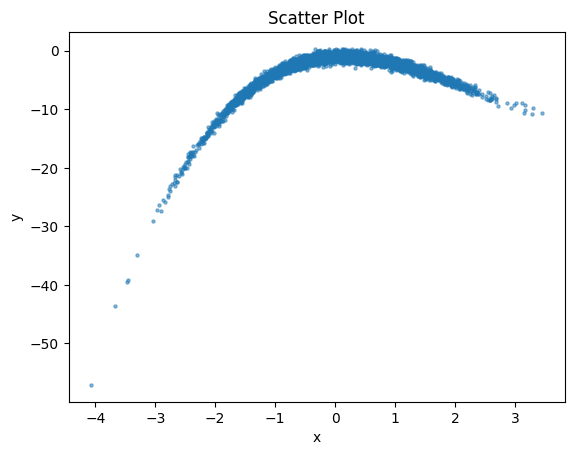

In [ ]:
# Visualising Data

plt.scatter(x, y, s=5, alpha=0.5, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

Implemention of Adaline and Sigmoid Neuron using Batch Gradient Decescent and Stochastic Gradient Decesent

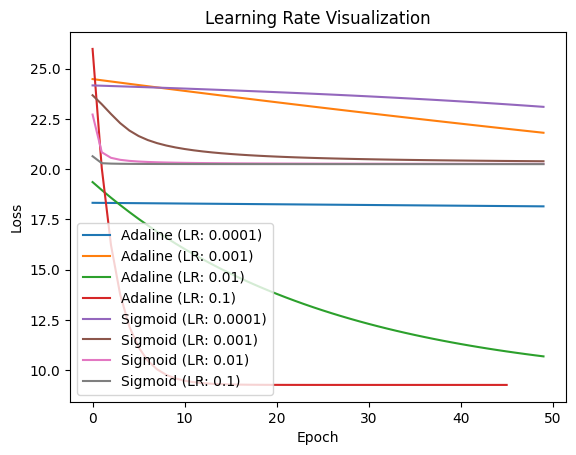

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Reshape x and y for TensorFlow
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Adaline model
def build_adaline_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,), activation='linear')
    ])
    return model

# Sigmoid model
def build_sigmoid_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
    ])
    return model

# 10-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


adaline_performance = []
sigmoid_performance = []

# Learning rate visualization
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
loss_history_adaline = []
loss_history_sigmoid = []

for lr in learning_rates:
    # Buildind and compiling the Adaline model with BGD
    adaline_model_bgd = build_adaline_model()
    adaline_model_bgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')

    # Train the Adaline model with BGD
    history_adaline_bgd = adaline_model_bgd.fit(x, y, epochs=50, batch_size=len(x), verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    loss_history_adaline.append(history_adaline_bgd.history['loss'])

    # Building and compiling the Sigmoid model with SGD
    sigmoid_model_sgd = build_sigmoid_model()
    sigmoid_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')

    # Train the Sigmoid model with SGD
    history_sigmoid_sgd = sigmoid_model_sgd.fit(x, y, epochs=50, batch_size=32, verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    loss_history_sigmoid.append(history_sigmoid_sgd.history['loss'])

# Plot the learning rate against the loss for Adaline (BGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_adaline[i], label=f'Adaline (LR: {lr})')

# Plot the learning rate against the loss for Sigmoid (SGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_sigmoid[i], label=f'Sigmoid (LR: {lr})')

plt.title('Learning Rate Visualization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


This above plot shows the loss for different learning rate for the both Adaline and Sigmoid neuron.

Epoch: 50

Bactch Size: 32


**10-fold cross-validation**


In [ ]:
for train_index, test_index in kf.split(x):
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Build and compile the Adaline model
    adaline_model = build_adaline_model()
    adaline_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Adaline model
    adaline_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Adaline model
    adaline_loss = adaline_model.evaluate(x_val, y_val, verbose=0)
    adaline_performance.append(adaline_loss)

    # Build and compile the Sigmoid model
    sigmoid_model = build_sigmoid_model()
    sigmoid_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Sigmoid model
    sigmoid_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Sigmoid model
    sigmoid_loss = sigmoid_model.evaluate(x_val, y_val, verbose=0)
    sigmoid_performance.append(sigmoid_loss)

# average performance across all folds
adaline_average_performance = np.mean(adaline_performance)
sigmoid_average_performance = np.mean(sigmoid_performance)

print(f'Adaline Average Validation Loss: {adaline_average_performance}')
print(f'Sigmoid Average Validation Loss: {sigmoid_average_performance}')

Adaline Average Validation Loss: 9.4142080783844
Sigmoid Average Validation Loss: 20.26114149093628


**Question2**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tqdm import tqdm

### Step 1: Create Synthetic Data
We will create a dataset of 5000 points that are linearly separable.

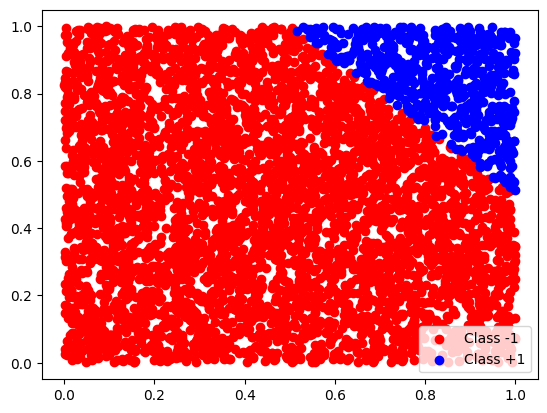

In [ ]:
def generate_data(n_samples=2500):
  """
  Generates data points linearly separable by a line y = x + 1
  """
  X = np.random.rand(n_samples, 2)  # 2D features
  y = np.where(X[:, 0] + X[:, 1] < 1.5, -1, 1)  # Class labels
  return X, y

X, y = generate_data(5000)  # Generate 5000 data points


# # Combine into one dataset
# X = np.vstack((class_1, class_2))
# y = np.hstack((-np.ones(n_points), np.ones(n_points)))

# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Plotting the dataset
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Class -1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class +1')
plt.legend()
plt.show()


### Step 2: Implement the Perceptron Learning Algorithm

In [ ]:
class Perceptron:
    def __init__(self, eta=0.01):
        self.eta = eta  # Learning rate
        self.w = None  # Weights will be initialized during training

    def predict(self, X):
        # Add bias term to input features
        X_bias = np.c_[X, np.ones(X.shape[0])]
        return np.sign(np.dot(X_bias, self.w))

    def train(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]  # Add bias term to input features
        self.w = np.random.rand(X_bias.shape[1])  # Initialize weights including bias
        converged = False
        epochs = 0
        while not converged:
            epochs += 1
            errors = 0
            for i in range(len(X_bias)):
                prediction = self.predict(X[i].reshape(1, -1))
                update = self.eta * (y[i] - prediction)
                self.w += update * X_bias[i]  # Update with bias term
                errors += int(update != 0)  # Check for update (error)
            converged = errors == 0
        print(f"Converged in {epochs} epochs")

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

### Step 3: Cross Validation in Perceptron
Here we apply the 5-fold cross validation on the perceptron model

In [ ]:
def cv_perceptron(X, y, k_folds=5, eta=0.01):
  kf = KFold(n_splits=k_folds, shuffle=True)
  accuracy_scores = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Perceptron(eta)
    model.train(X_train, y_train)
    accuracy_scores.append(model.accuracy(X_test, y_test))
  return np.mean(accuracy_scores)


### Step 4 : Performance vs Learning Rates
We analyze the accuracy and timing of the model with varying learning rates. The trends are shown in the plots afterwards

In [ ]:
import time

learning_rates = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1]
accuracies = []
timings = []
for lr in learning_rates:
  start = time.time()
  accuracy = cv_perceptron(X.copy(), y.copy(), eta=lr)
  end = time.time()
  timings.append((end - start)/60)
  accuracies.append(accuracy)
  print(f"Learning rate: {lr}, Accuracy: {accuracy:.4f}")

<ipython-input-3-83ff43d9581e>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0)  # Check for update (error)


Converged in 12 epochs
Converged in 192 epochs
Converged in 46 epochs
Converged in 24 epochs
Converged in 203 epochs
Learning rate: 0.001, Accuracy: 0.9998
Converged in 42 epochs
Converged in 8 epochs
Converged in 11 epochs
Converged in 19 epochs
Converged in 24 epochs
Learning rate: 0.0025, Accuracy: 0.9994
Converged in 90 epochs
Converged in 5 epochs
Converged in 9 epochs
Converged in 14 epochs
Converged in 8 epochs
Learning rate: 0.005, Accuracy: 0.9996
Converged in 779 epochs
Converged in 22 epochs
Converged in 36 epochs
Converged in 7 epochs
Converged in 18 epochs
Learning rate: 0.0075, Accuracy: 0.9998
Converged in 3 epochs
Converged in 57 epochs
Converged in 39 epochs
Converged in 30 epochs
Converged in 17 epochs
Learning rate: 0.01, Accuracy: 0.9998
Converged in 65 epochs
Converged in 11 epochs
Converged in 105 epochs
Converged in 25 epochs
Converged in 8 epochs
Learning rate: 0.025, Accuracy: 0.9996
Converged in 15 epochs
Converged in 61 epochs
Converged in 22 epochs
Converged

### Step 5 : Accuracy vs Learning Rate Curve

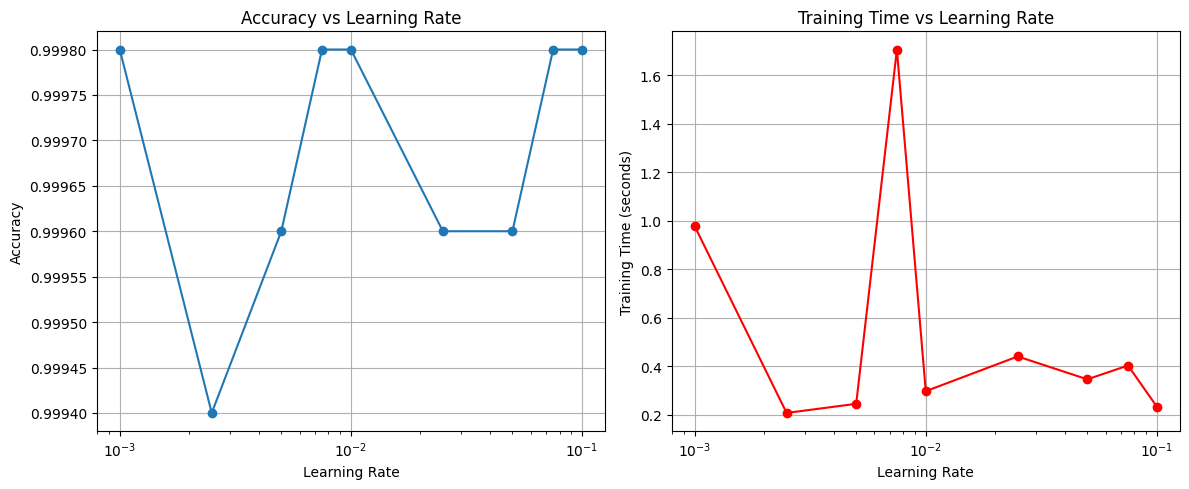

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracies against learning rates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.xscale('log')  # Log scale for learning rates
plt.grid(True)

# Plotting the timings against learning rates
plt.subplot(1, 2, 2)
plt.plot(learning_rates, timings, marker='o', color='red')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Learning Rate')
plt.xscale('log')  # Log scale for learning rates
plt.grid(True)

plt.tight_layout()
plt.show()

The results for the Perceptron model show that accuracy is consistently high across various learning rates, hovering around 0.9998, except for a notable dip at 0.01 where it falls to about 0.9994. Training time, however, exhibits significant variability: it is highest at the lowest learning rate (0.001) with around 1.6 seconds, drops substantially at 0.003, and remains relatively low and stable for higher learning rates, with the lowest training time around 0.1 seconds at a learning rate of 0.01. Overall, while the Perceptron model maintains high accuracy across different learning rates, its training time is more sensitive to changes in the learning rate.

### Step 6: Implement the Pocket Algorithm
We choose the Pocket Algorithm as it is one of the simpler variants of the Perceptron.

In [ ]:
class PocketPerceptron:
    def __init__(self, eta=0.01, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.best_weights = None
        self.best_bias = None
        self.best_accuracy = -1

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)  # Random initialization of weights
        self.bias = np.random.randn()  # Random initialization of bias
        self.best_weights = self.weights.copy()
        self.best_bias = self.bias

        for _ in tqdm(range(self.n_iterations)):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * linear_output <= 0:
                    self.weights += self.eta * y[idx] * x_i
                    self.bias += self.eta * y[idx]

                    accuracy = np.mean(y == self.predict(X))
                    if accuracy > self.best_accuracy:
                        self.best_weights = self.weights.copy()
                        self.best_bias = self.bias
                        self.best_accuracy = accuracy

    def predict(self, X):
        linear_output = np.dot(X, self.best_weights) + self.best_bias
        return np.sign(linear_output)

### Step 7: Cross Validation in Pocket Perceptron Model

In [ ]:
def cv_pocket_perceptron(X, y, k_folds=5, eta=0.01, n_iterations=100):
    kf = KFold(n_splits=k_folds, shuffle=True)
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = PocketPerceptron(eta=eta, n_iterations=n_iterations)
        model.fit(X_train, y_train)

        accuracy_scores.append(np.mean(model.predict(X_test) == y_test))

    return np.mean(accuracy_scores)

### Step 8: Performance vs Learning Rates in Pocket Perceptron
We can analyze how performance varies with different learning rates, training sizes, etc. for the Pocket Perceptron

In [ ]:
import time

learning_rates = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1]
accuracies = []
timings = []
for lr in learning_rates:
  start = time.time()
  accuracy = cv_pocket_perceptron(X.copy(), y.copy(), eta=lr)
  end = time.time()
  timings.append((end - start)/60)
  accuracies.append(accuracy)
  print(f"Learning rate: {lr}, Accuracy: {accuracy:.4f}")

100%|██████████| 100/100 [00:01<00:00, 52.07it/s]


Learning rate: 0.001, Accuracy: 0.4648


100%|██████████| 100/100 [00:01<00:00, 76.30it/s]


Learning rate: 0.0025, Accuracy: 0.5106


100%|██████████| 100/100 [00:01<00:00, 81.85it/s]


Learning rate: 0.005, Accuracy: 0.7414


100%|██████████| 100/100 [00:01<00:00, 86.39it/s]


Learning rate: 0.0075, Accuracy: 0.4152


100%|██████████| 100/100 [00:01<00:00, 84.96it/s]


Learning rate: 0.01, Accuracy: 0.7218


100%|██████████| 100/100 [00:01<00:00, 83.88it/s]


Learning rate: 0.025, Accuracy: 0.8784


100%|██████████| 100/100 [00:01<00:00, 84.98it/s]


Learning rate: 0.05, Accuracy: 0.6336


100%|██████████| 100/100 [00:01<00:00, 81.48it/s]


Learning rate: 0.075, Accuracy: 0.6412


100%|██████████| 100/100 [00:01<00:00, 81.33it/s]

Learning rate: 0.1, Accuracy: 0.7794


### Step 9 : Plot the Curves

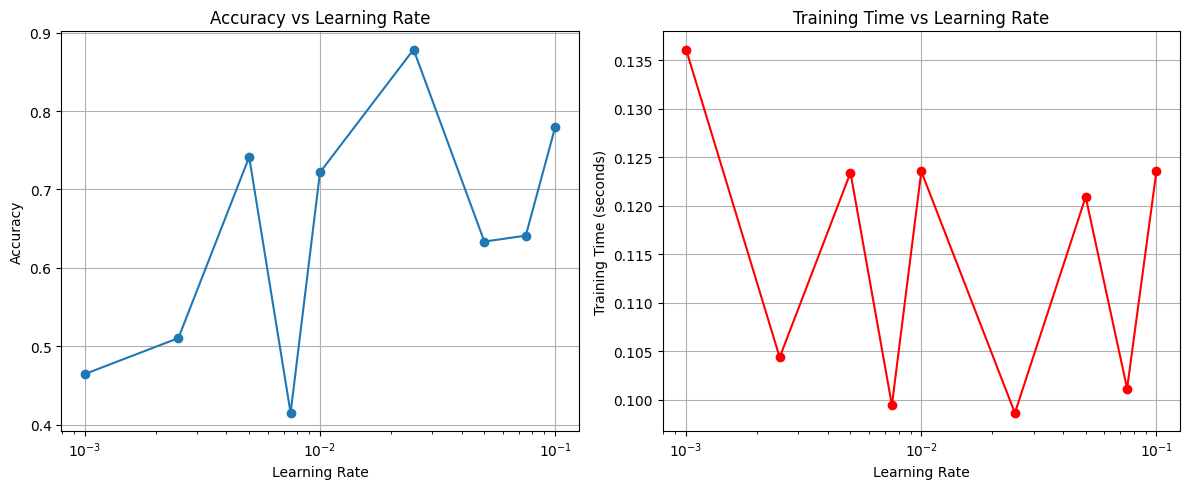

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracies against learning rates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.xscale('log')  # Log scale for learning rates
plt.grid(True)

# Plotting the timings against learning rates
plt.subplot(1, 2, 2)
plt.plot(learning_rates, timings, marker='o', color='red')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Learning Rate')
plt.xscale('log')  # Log scale for learning rates
plt.grid(True)

plt.tight_layout()
plt.show()

The results show that the accuracy of the Pocket Perceptron model generally improves with increasing learning rates up to 0.05, where it peaks around 0.9, before declining slightly at higher rates, indicating potential instability. Training times tend to decrease as learning rates increase, with the highest time recorded at the lowest learning rate (0.001) and the shortest time around 0.01. However, at moderate learning rates, training times exhibit significant fluctuations. Overall, a learning rate of 0.05 achieves the best balance of high accuracy and reasonable training time.